In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
data = pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
#drop unnecessary columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#data cleaning 
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
#statistics about data
data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


### Feature Engineering and Visualization

In [7]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [8]:
#convert all the values to upper case
data['Company'] = data['Company'].str.upper()
data['Company'].unique()

array(['APPLE', 'HP', 'ACER', 'ASUS', 'DELL', 'LENOVO', 'CHUWI', 'MSI',
       'MICROSOFT', 'TOSHIBA', 'HUAWEI', 'XIAOMI', 'VERO', 'RAZER',
       'MEDIACOM', 'SAMSUNG', 'GOOGLE', 'FUJITSU', 'LG'], dtype=object)

In [9]:
fig = px.histogram(data, x='Company', y='Price')
fig.show()

In [10]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [11]:
#Inches column
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [12]:
data.Inches.dtype

dtype('float64')

In [13]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
#check if the screen is IPS or not
data['IPS'] = data['ScreenResolution'].str.contains('IPS')
data['IPS']  = data['IPS'].astype(int)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
0,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1
1,APPLE,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,APPLE,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1
4,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1


In [15]:
#check if the screen is Touchscreen or not
data['Touchscreen'] = data['ScreenResolution'].str.contains('Touchscreen')
data['Touchscreen'] = data['Touchscreen'].astype(int)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
0,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0
1,APPLE,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,APPLE,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0
4,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0


In [16]:
#check if the screen is 4k or not
data['4k'] = data['ScreenResolution'].str.contains('4K')
data['4k'] = data['4k'].astype(int)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k
0,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0
1,APPLE,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0
3,APPLE,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0
4,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0


In [17]:
#extract y and x resolution values 
data['X_Resolution'] = (data['ScreenResolution'].str.extract('(\d+)x(\d+)'))[0].astype(int)
data['Y_Resolution'] = (data['ScreenResolution'].str.extract('(\d+)x(\d+)'))[1].astype(int)
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,X_Resolution,Y_Resolution
0,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,2560,1600
1,APPLE,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,1920,1080
3,APPLE,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,2880,1800
4,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,2560,1600


In [18]:
#create new column to calculate pixel per inch using x and y resolution and inches
data['PPI'] = (data['X_Resolution']**2 + data['Y_Resolution']**2)**0.5 / data['Inches']
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,X_Resolution,Y_Resolution,PPI
0,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,2560,1600,226.983005
1,APPLE,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,1920,1080,141.211998
3,APPLE,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,2880,1800,220.534624
4,APPLE,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,2560,1600,226.983005


In [23]:
#check the correlation between price and columns we created
data.select_dtypes(include=[float, int]).corr()['Price']

Inches          0.068197
Price           1.000000
IPS             0.252208
Touchscreen     0.191226
4k              0.343982
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [24]:
#drop unnecessary columns
data.drop(['ScreenResolution', 'X_Resolution', 'Y_Resolution', 'Inches'], axis=1, inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI
0,APPLE,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005
1,APPLE,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998
3,APPLE,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624
4,APPLE,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005


In [25]:
#cpu column
len(data['Cpu'].unique())

118

In [26]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [27]:
#there are 118 different cpu types in the data, which is too many options. We can groups them into 6 categories, like Intel Core i3, Intel Core i5, Intel Core i7, Intel Celeron, AMD and others.
def cpu_group(cpu):
    if cpu.startswith('Intel Core i3'):
        return 'Intel Core i3'
    elif cpu.startswith('Intel Core i5'):
        return 'Intel Core i5'
    elif cpu.startswith('Intel Core i7'):
        return 'Intel Core i7'
    elif cpu.startswith('Intel Celeron'):
        return 'Intel Celeron'
    elif cpu.startswith('AMD'):
        return 'AMD'
    else:
        return 'Others'

In [28]:
data['cpu_brand'] = data['Cpu'].apply(cpu_group)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand
0,APPLE,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5
1,APPLE,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5
3,APPLE,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7
4,APPLE,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5


In [29]:
#drop cpu column
data.drop(['Cpu'], axis=1, inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand
0,APPLE,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5
1,APPLE,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5
3,APPLE,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7
4,APPLE,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5


In [30]:
#ram column
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [31]:
#clean ram column by removing the unit
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Ram'] = data['Ram'].astype(int)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand
0,APPLE,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5
1,APPLE,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5
3,APPLE,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7
4,APPLE,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5


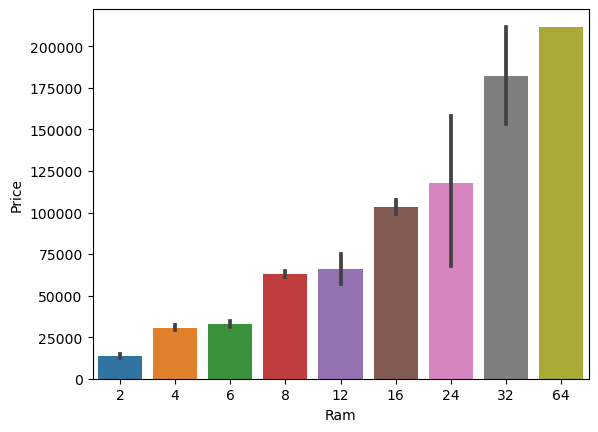

In [32]:
#check the correlation between ram and price
sns.barplot(x='Ram', y='Price', data=data)
plt.show()

In [33]:
#we can see the strong correlation between ram and price

In [34]:
#memory column
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [35]:
#replace gb and tb with numeric
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')
data['Memory'] = data['Memory'].str.replace('1.0', '1')


In [36]:
data['Memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [37]:
#seperate memory slots written with '+'
memory = data['Memory'].str.split('+', n=1, expand=True)
data['Memory1'] = memory[0]
data['Memory2'] = memory[1]

In [38]:
data['HDD1'] = data['Memory1'].apply(lambda x: x if 'HDD' in x else 0)
data['SSD1'] = data['Memory1'].apply(lambda x: x if 'SSD' in x else 0)
data['FS1'] = data['Memory1'].apply(lambda x: x if 'Flash Storage' in x else 0)
data['Hybrid1'] = data['Memory1'].apply(lambda x: x if 'Hybrid' in x else 0)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand,Memory1,Memory2,HDD1,SSD1,FS1,Hybrid1
0,APPLE,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5,128 SSD,None,0,128 SSD,0,0
1,APPLE,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,128 Flash Storage,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5,256 SSD,None,0,256 SSD,0,0
3,APPLE,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7,512 SSD,None,0,512 SSD,0,0
4,APPLE,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5,256 SSD,None,0,256 SSD,0,0


In [39]:
data['Memory2'].fillna("No value", inplace=True)
data['HDD2'] = data['Memory2'].apply(lambda x: x if 'HDD' in x else 0)
data['SSD2'] = data['Memory2'].apply(lambda x: x if 'SSD' in x else 0)

In [40]:
data.drop(['Memory1','Memory2'], axis=1,  inplace=True)

In [41]:
data['SSD1'].unique()

array(['128 SSD', 0, '256 SSD', '512 SSD', '128 SSD ', '256 SSD ',
       '32 SSD', '64 SSD', '512 SSD ', '1000 SSD', '16 SSD', '180 SSD',
       '1000 SSD ', '240 SSD', '8 SSD'], dtype=object)

In [42]:
data['HDD1'] = data['HDD1'].astype(str)
data['HDD1'] = data['HDD1'].map(lambda x: x.rstrip('HDD '))
data['SSD1'] = data['SSD1'].astype(str)
data['SSD1'] = data['SSD1'].map(lambda x: x.rstrip('SSD '))
data['FS1'] = data['FS1'].astype(str)
data['FS1'] = data['FS1'].map(lambda x: x.rstrip('Flash Storage '))
data['Hybrid1'] = data['Hybrid1'].astype(str)
data['Hybrid1'] = data['Hybrid1'].map(lambda x: x.rstrip('Hybrid '))
data['HDD2'] = data['HDD2'].astype(str)
data['HDD2'] = data['HDD2'].map(lambda x: x.rstrip('HDD '))
data['SSD2'] = data['SSD2'].astype(str)
data['SSD2'] = data['SSD2'].map(lambda x: x.rstrip('SSD '))

In [43]:
data['HDD1'] = data['HDD1'].astype(int)

data['SSD1'] = data['SSD1'].astype(int)

data['FS1'] = data['FS1'].astype(int)

data['Hybrid1'] = data['Hybrid1'].astype(int)

data['HDD2'] = data['HDD2'].astype(int)

data['SSD2'] = data['SSD2'].astype(int)


In [44]:
data['HDD'] = data['HDD1'] + data['HDD2']
data['SSD'] = data['SSD1'] + data['SSD2']
data.drop(['HDD1','HDD2','SSD1','SSD2'], axis=1,  inplace=True)

In [45]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand,FS1,Hybrid1,HDD,SSD
0,APPLE,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5,0,0,0,128
1,APPLE,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5,128,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5,0,0,0,256
3,APPLE,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7,0,0,0,512
4,APPLE,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5,0,0,0,256


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   object 
 7   Price        1303 non-null   float64
 8   IPS          1303 non-null   int32  
 9   Touchscreen  1303 non-null   int32  
 10  4k           1303 non-null   int32  
 11  PPI          1303 non-null   float64
 12  cpu_brand    1303 non-null   object 
 13  FS1          1303 non-null   int32  
 14  Hybrid1      1303 non-null   int32  
 15  HDD          1303 non-null   int32  
 16  SSD          1303 non-null   int32  
dtypes: float64(2), int32(8), object(7)
memory usage: 132.5+ KB


In [48]:
data.select_dtypes(include=[float, int]).corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
SSD            0.670799
PPI            0.473487
4k             0.343982
IPS            0.252208
Touchscreen    0.191226
Hybrid1       -0.040147
FS1           -0.040511
HDD           -0.096441
Name: Price, dtype: float64

We can see that Flash storage and Hybrid have very low correlation with price column. So we can drop them

In [49]:
data.drop(['FS1','Hybrid1', 'Memory'], axis=1,  inplace=True)

In [50]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand,HDD,SSD
0,APPLE,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,226.983005,Intel Core i5,0,128
1,APPLE,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,141.211998,Intel Core i5,0,256
3,APPLE,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,220.534624,Intel Core i7,0,512
4,APPLE,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,226.983005,Intel Core i5,0,256


In [51]:
#gpu column
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

There are too many GPU options, I will categorize them into 3 main categories(Intel, Nvidia and AMD).

In [52]:
#categorize GPU into 3 categories
def gpu_group(gpu):
    if gpu.startswith('Nvidia'):
        return 'Nvidia'
    elif gpu.startswith('AMD'):
        return 'AMD'
    elif gpu.startswith('Intel'):
        return 'Intel'
    else:
        return 'Others'

data['Gpu'] = data['Gpu'].apply(gpu_group)
    

In [53]:
#os
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

We can do categorizing for operating systems as well.

In [54]:
#categorize OS into 3 categories
def os_group(os):
    if os.startswith('Windows'):
        return 'Windows'
    elif os.startswith('Mac'):
        return 'Mac'
    elif os.startswith('Linux'):
        return 'Linux'
    elif os.startswith('No OS'):
        return 'No OS'
    else:
        return 'Others'

data['OpSys'] = data['OpSys'].apply(os_group)

In [55]:
#weight colun
data['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [56]:
data['Weight'] = data['Weight'].map(lambda x: x.rstrip('kg'))
data['Weight'] = data['Weight'].astype(float)

In [59]:
#correlation
data.select_dtypes(include=[float, int]).corr()['Price'].sort_values(ascending=False)

Price     1.000000
Ram       0.743007
SSD       0.670799
PPI       0.473487
Weight    0.210370
HDD      -0.096441
Name: Price, dtype: float64

In [60]:
#replace 1 and 0 with Yes and No in IPS, Touchscreen and 4K column
data['IPS'] = data['IPS'].map(lambda x: 'Yes' if x == 1 else 'No')
data['Touchscreen'] = data['Touchscreen'].map(lambda x: 'Yes' if x == 1 else 'No')
data['4k'] = data['4k'].map(lambda x: 'Yes' if x == 1 else 'No')

In [61]:
#final data
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,4k,PPI,cpu_brand,HDD,SSD
0,APPLE,Ultrabook,8,Intel,Others,1.37,71378.6832,No,No,No,226.983005,Intel Core i5,0,128
1,APPLE,Ultrabook,8,Intel,Others,1.34,47895.5232,No,No,No,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,No,No,No,141.211998,Intel Core i5,0,256
3,APPLE,Ultrabook,16,AMD,Others,1.83,135195.3360,No,No,No,220.534624,Intel Core i7,0,512
4,APPLE,Ultrabook,8,Intel,Others,1.37,96095.8080,No,No,No,226.983005,Intel Core i5,0,256


C:\Users\aliyu\AppData\Local\Temp\ipykernel_22116\2411662057.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

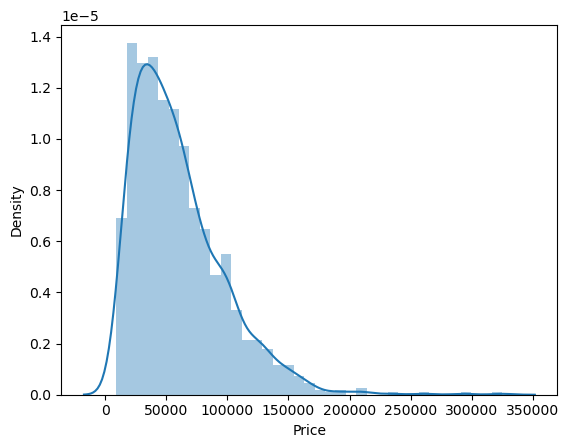

In [62]:
#check the price distribution
sns.distplot(data['Price'])

C:\Users\aliyu\AppData\Local\Temp\ipykernel_22116\2806502979.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

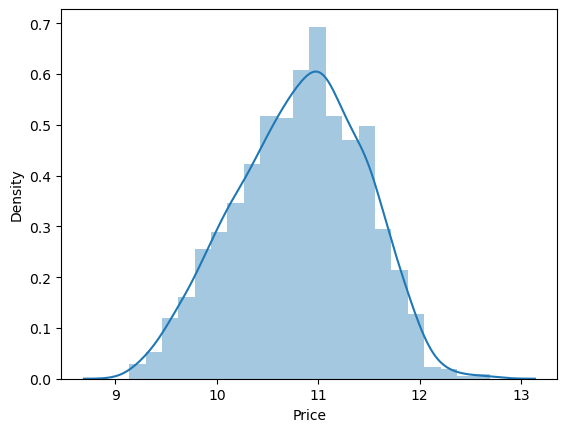

In [63]:
#if we do log transformation, we can see the distribution is more skewed towards the right side and it will improve the performance 
sns.distplot(np.log(data['Price']))

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   Price        1303 non-null   float64
 7   IPS          1303 non-null   object 
 8   Touchscreen  1303 non-null   object 
 9   4k           1303 non-null   object 
 10  PPI          1303 non-null   float64
 11  cpu_brand    1303 non-null   object 
 12  HDD          1303 non-null   int32  
 13  SSD          1303 non-null   int32  
dtypes: float64(3), int32(3), object(8)
memory usage: 127.4+ KB


In [65]:
#train and test split
X = data.drop(['Price'], axis=1)
y = np.log(data['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Now we can build our machine learning model, I have tried some models and got the best result with Random Forest Regression, you can try other models too
transfermer = ColumnTransformer(transformers = [
    ('one_hot_encoder', OneHotEncoder(sparse=False, categories = 'auto'), ['Company', 'TypeName', 'Gpu', 'OpSys', 'IPS', 'Touchscreen', '4k', 'cpu_brand']),
], remainder = 'passthrough')
model = RandomForestRegressor(n_estimators=100, random_state=0)

pipe = Pipeline(steps=[('preprocessor', transfermer), ('model', model)])

pipe.fit(X_train, y_train)

print('MAE:', mean_absolute_error(y_test, pipe.predict(X_test)))


c:\Users\aliyu\anaconda3\envs\laptop_price\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



MAE: 0.15567919804038674


In [67]:
#now we can export our model and dataset so we can use it in our web app
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))
data.to_csv('clean_data.csv', index=False)